In [1]:
import pandas as pd
import numpy as np
#import geopandas as gpd
import matplotlib.pyplot as plt 

In [97]:
vacc=pd.read_csv('2021-05-19_country_vaccinations.csv')
manuVac=pd.read_csv('2021-05-19_country_vaccinations_by_manufacturer.csv')  
vacc['date'] = pd.to_datetime(vacc['date'], format='%Y-%m-%d')
vacc=vacc.set_index('date')

In [98]:
vacc

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-23,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-24,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-25,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-26,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-08,Zimbabwe,ZWE,657838.0,509274.0,148564.0,17076.0,19648.0,4.43,3.43,1.00,1322.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
2021-05-09,Zimbabwe,ZWE,684243.0,526066.0,158177.0,26405.0,22863.0,4.60,3.54,1.06,1538.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
2021-05-10,Zimbabwe,ZWE,690653.0,529360.0,161293.0,6410.0,21877.0,4.65,3.56,1.09,1472.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...


In [3]:

posCountry=pd.read_csv("countries_codes_and_coordinates.csv")

posCountry = posCountry.replace('"', '', regex=True)
posCountry = posCountry.rename(columns={'Alpha-3 code': ' code','Latitude (average)': ' lat','Longitude (average)': ' lon',})
del posCountry['Alpha-2 code']
del posCountry['Numeric code']
vacc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17607 entries, 0 to 17606
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              17607 non-null  object 
 1   iso_code                             17607 non-null  object 
 2   date                                 17607 non-null  object 
 3   total_vaccinations                   10251 non-null  float64
 4   people_vaccinated                    9526 non-null   float64
 5   people_fully_vaccinated              7185 non-null   float64
 6   daily_vaccinations_raw               8568 non-null   float64
 7   daily_vaccinations                   17391 non-null  float64
 8   total_vaccinations_per_hundred       10251 non-null  float64
 9   people_vaccinated_per_hundred        9526 non-null   float64
 10  people_fully_vaccinated_per_hundred  7185 non-null   float64
 11  daily_vaccinations_per_milli

In [4]:
byCountry=vacc.groupby('country').mean().reset_index() 


In [5]:
countryFinal = byCountry[byCountry['country'].isin(posCountry['Country'])]
countryFinal = countryFinal.reset_index(drop=True)
countryL = (posCountry[posCountry['Country'].isin(byCountry['country'])])
countryL = countryL.reset_index(drop=True)
df=[countryL,countryFinal]
finalCountries = pd.concat(df, axis=1)
finalCountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              188 non-null    object 
 1    code                                188 non-null    object 
 2    lat                                 188 non-null    object 
 3    lon                                 188 non-null    object 
 4   country                              188 non-null    object 
 5   total_vaccinations                   188 non-null    float64
 6   people_vaccinated                    183 non-null    float64
 7   people_fully_vaccinated              137 non-null    float64
 8   daily_vaccinations_raw               135 non-null    float64
 9   daily_vaccinations                   178 non-null    float64
 10  total_vaccinations_per_hundred       188 non-null    float64
 11  people_vaccinated_per_hundred   

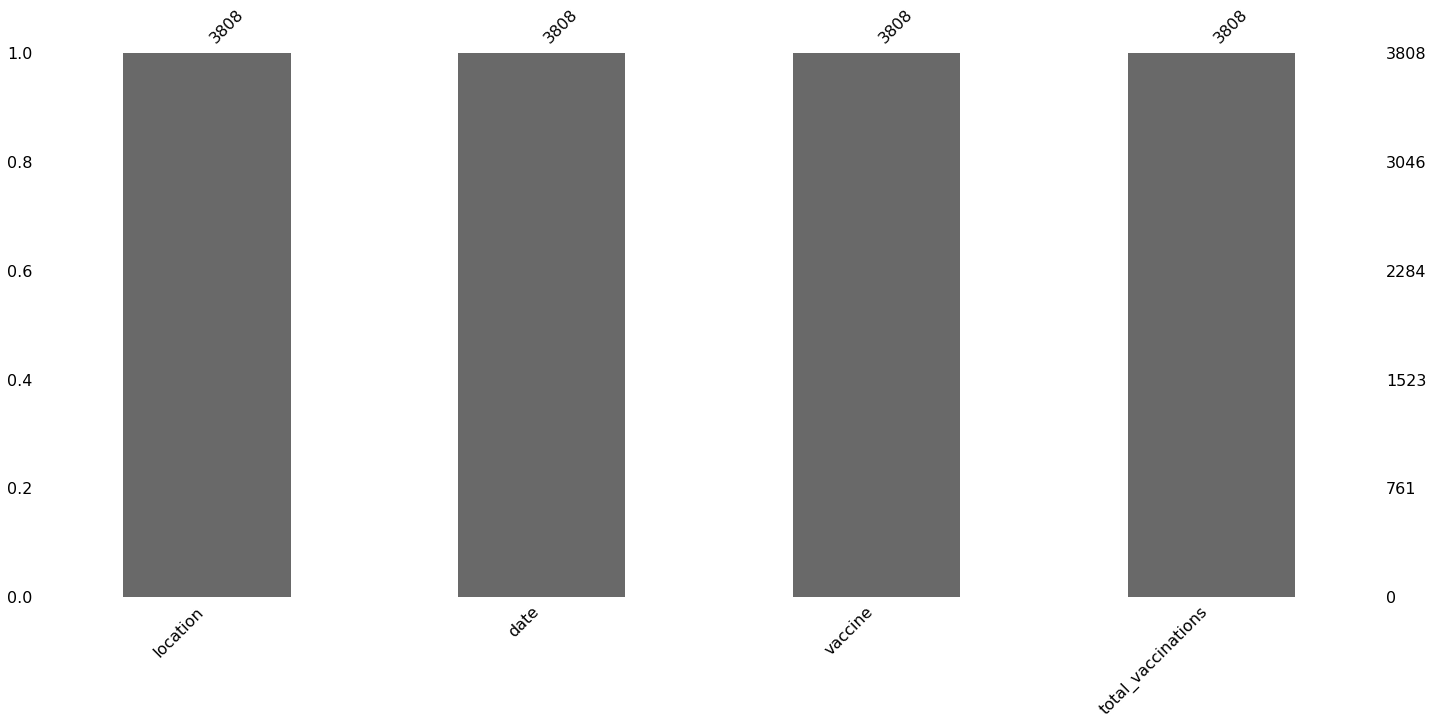

In [7]:
import missingno as msno
import matplotlib.pyplot as plt

# Plot amount of missingness
msno.bar(manuVac) # you can see pandas-profilin count part

plt.show()

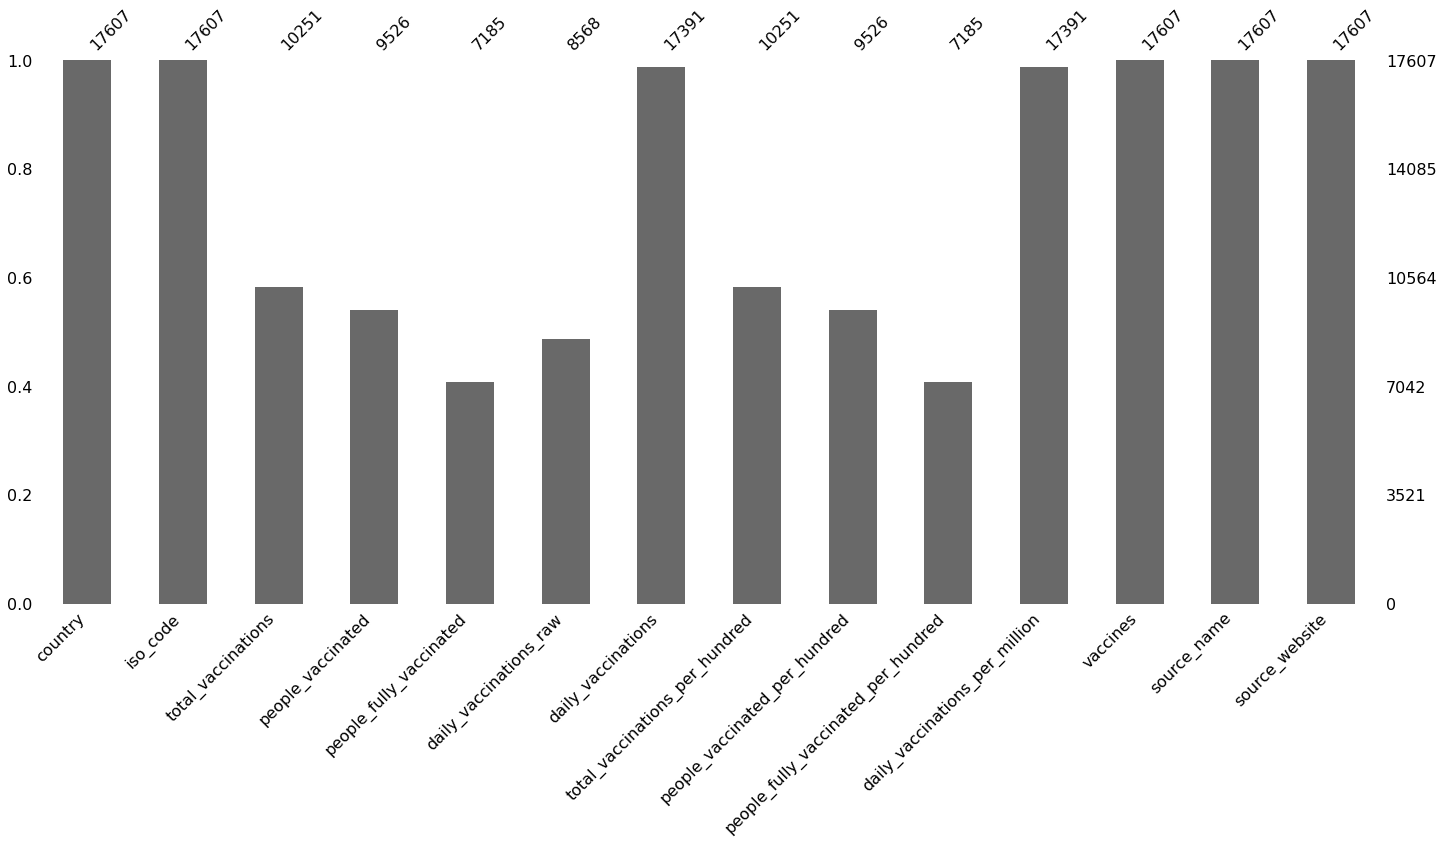

In [62]:
import missingno as msno
import matplotlib.pyplot as plt

# Plot amount of missingness
msno.bar(vacc) # you can see pandas-profilin count part

plt.show()

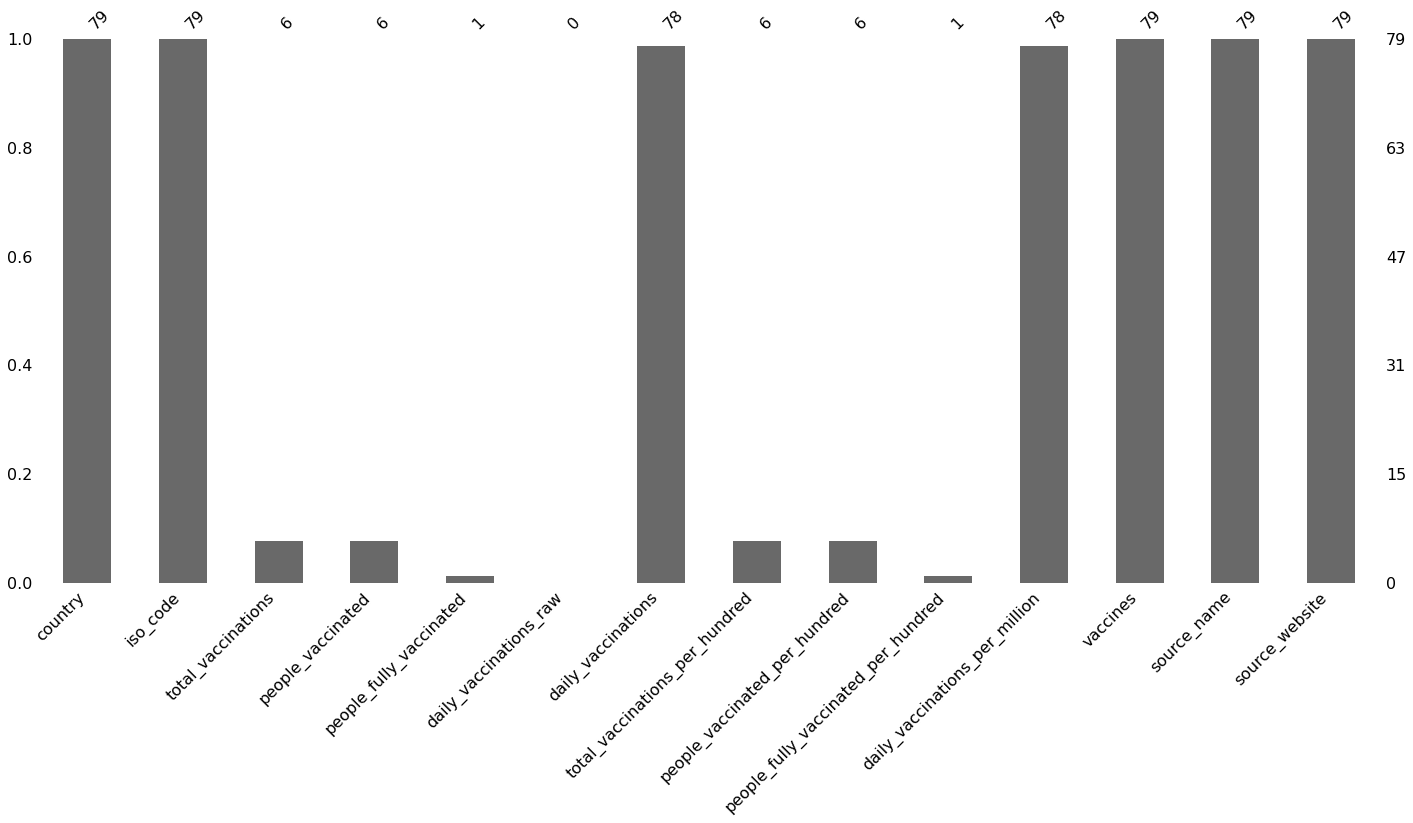

In [85]:
afgi=vacc[vacc['country'] == 'Afghanistan']
msno.bar(afgi) # you can see pandas-profilin count part

plt.show()

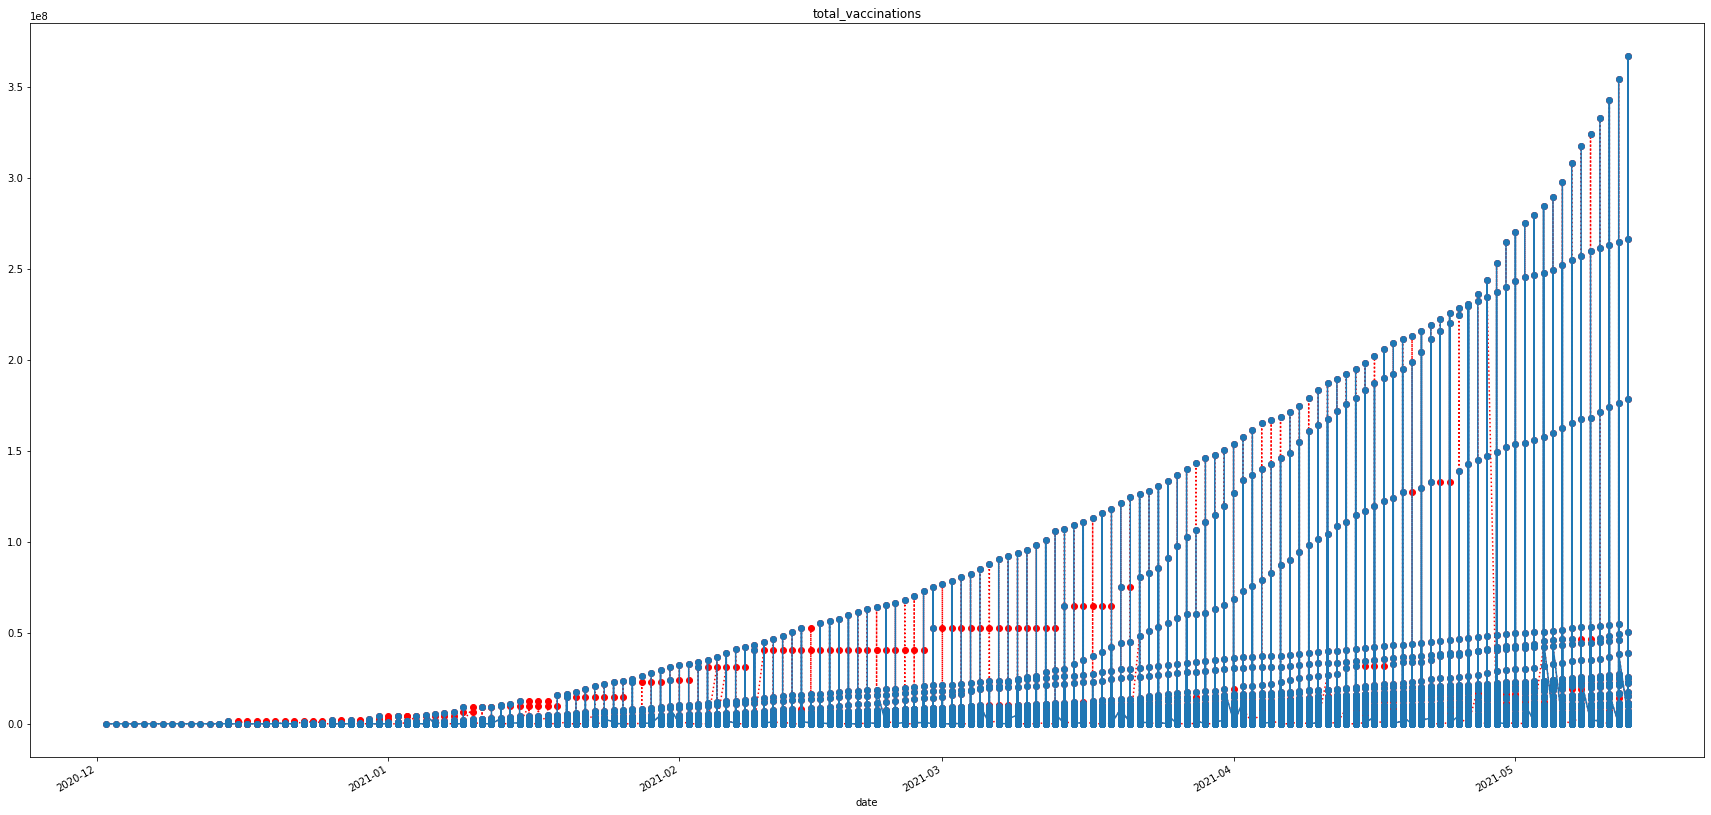

In [100]:
bfill_imputed = vacc.copy(deep=True)

bfill_imputed['total_vaccinations'].fillna(method='ffill',inplace=True)

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['total_vaccinations'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 15))

# Plot the airquality DataFrame with title
vacc['total_vaccinations'].plot(title='total_vaccinations', marker='o', figsize=(30, 15))

plt.show()

In [95]:
afgiAfter=bfill_imputed[bfill_imputed['country'] == 'Afghanistan']
afgiAfter

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0.0,0.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-23,Afghanistan,AFG,0.0,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-24,Afghanistan,AFG,0.0,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-25,Afghanistan,AFG,0.0,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-26,Afghanistan,AFG,0.0,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07,Afghanistan,AFG,240000.0,NaN,NaN,NaN,13921.0,NaN,NaN,NaN,358.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-05-08,Afghanistan,AFG,240000.0,NaN,NaN,NaN,13921.0,NaN,NaN,NaN,358.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-05-09,Afghanistan,AFG,240000.0,NaN,NaN,NaN,13921.0,NaN,NaN,NaN,358.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


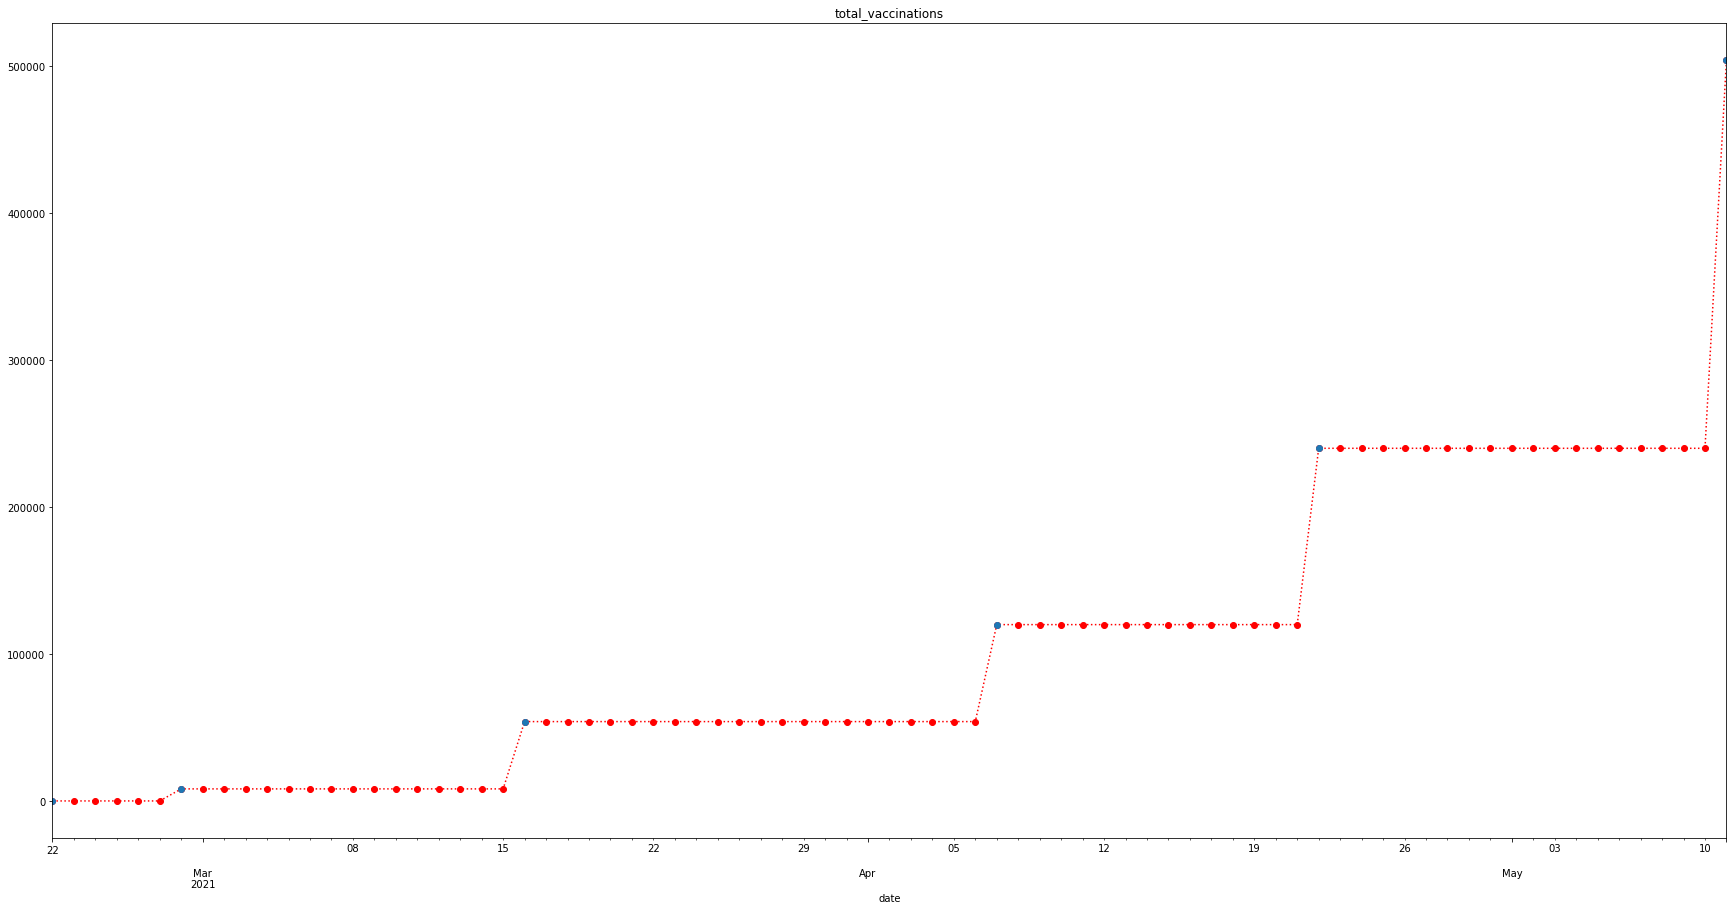

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0.0,0.0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-23,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-24,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-25,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-26,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-07,Afghanistan,AFG,NaN,NaN,NaN,NaN,13921.0,NaN,NaN,NaN,358.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-05-08,Afghanistan,AFG,NaN,NaN,NaN,NaN,13921.0,NaN,NaN,NaN,358.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-05-09,Afghanistan,AFG,NaN,NaN,NaN,NaN,13921.0,NaN,NaN,NaN,358.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [83]:
rslt_df = vacc[vacc['country'] == 'Afghanistan']
rslt_df1=bfill_imputed[bfill_imputed['country'] == 'Afghanistan']

rslt_df1['total_vaccinations'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 15))
rslt_df['total_vaccinations'].plot(title='total_vaccinations', marker='o', figsize=(30, 15))
plt.show()
rslt_df

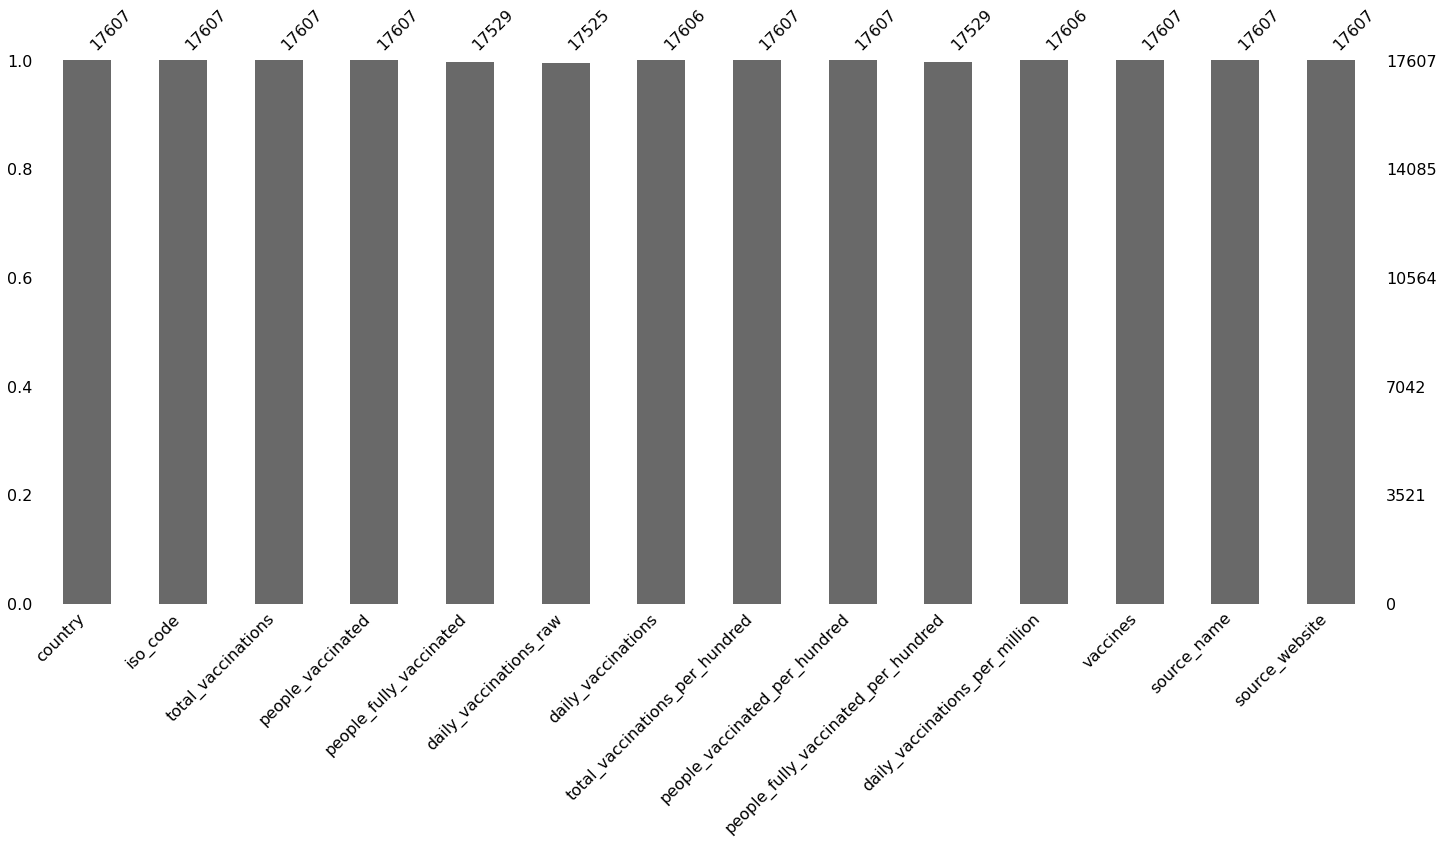

,country,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
date,,,,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-23,Afghanistan,AFG,0.0,0.0,NaN,NaN,1367.0,0.00,0.00,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-24,Afghanistan,AFG,0.0,0.0,NaN,NaN,1367.0,0.00,0.00,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-25,Afghanistan,AFG,0.0,0.0,NaN,NaN,1367.0,0.00,0.00,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2021-02-26,Afghanistan,AFG,0.0,0.0,NaN,NaN,1367.0,0.00,0.00,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-08,Zimbabwe,ZWE,657838.0,509274.0,148564.0,17076.0,19648.0,4.43,3.43,1.00,1322.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
2021-05-09,Zimbabwe,ZWE,684243.0,526066.0,158177.0,26405.0,22863.0,4.60,3.54,1.06,1538.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...
2021-05-10,Zimbabwe,ZWE,690653.0,529360.0,161293.0,6410.0,21877.0,4.65,3.56,1.09,1472.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1392575941...


In [40]:
msno.bar(bfill_imputed)

plt.show()
bfill_imputed